In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import tqdm
import rate_model as rm

In [2]:
# Itskov
params_dict = {
    # main params
    'sim_time': 5.,
    'dt': 0.001,
    'sampl_dt': 0.001,
    'N': 90,
    # connectivity params
    'J0': -10.0,
    'J1': 16.0,
    'J_EI': 0.0,
    'J_IE': 0.0,
    'eps': 0.5,
    'conn_width': 1.0,
    'conn_type' : 'cos',
    'seed': 0,
    # actvity params
    'U': 0.05,
    'I0': 10.0,
    'tau_d': 0.1,
    'tau_f': 1.,
    'tau': 0.01,
    'alpha': 1.5,
}

In [3]:
# Itskov
stim = {
    'stim_start': [.0],
    'stim_duration': [.05],
    'stim_ampl': [5.0],
    'stim_pos': [0.0],
    'stim_width': [1.],
    'stim_type': ['cos']
}

In [4]:
params_dict = {
    # main params
    'sim_time': 10.,
    'dt': 0.001,
    'sampl_dt': 0.01,
    'N': 90,

    'J0': -1.*2*np.pi,
    'J1': 12.*2*np.pi,
    'J_EI': 1.9,
    'J_IE': 1.8*2*np.pi,
    'eps': 0.5,
    'conn_width': 1/2.2,
    'conn_type' : 'trunc_cos',
    'seed': 0,

    'U': 0.3,
    'I0': -0.1,
    'tau_d': 0.3,
    'tau_f': 4.0,
    'tau': 0.01,
    'alpha': 1.5,
}

In [5]:
stim = {
    'stim_start': [.0],
    'stim_duration': [.05],
    'stim_ampl': [390.0],
    'stim_pos': [30.0],
    'stim_width': [1/2.2],
    'stim_type': ['trunc_cos']
}

In [6]:
def check_diff(phi2, phi1):
    dphi = phi2 - phi1
    if abs(dphi) < np.pi:
        return dphi
    else:
        if phi2 > 0:
            return dphi - 2*np.pi
        else:
            return dphi + 2*np.pi

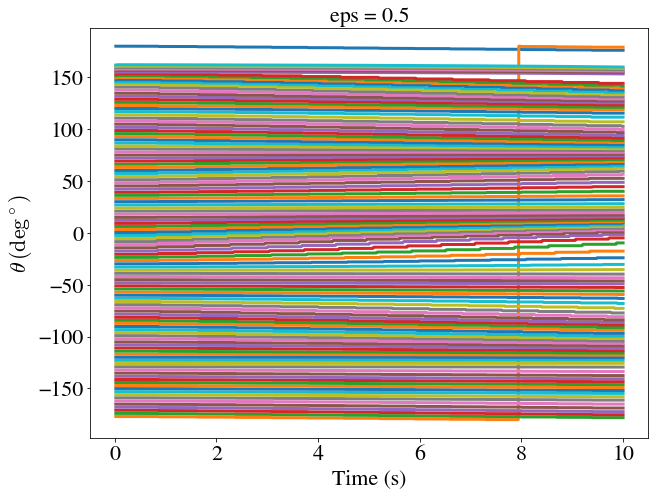

In [7]:
angles = np.arange(-180., 180, 3)
speeds = np.zeros_like(angles)

rate_network = rm.RateNetwork.init_all_params(**params_dict)
for i, st_pos in enumerate(tqdm.tqdm_notebook(angles)):
    stim['stim_pos'] = [st_pos]
    rate_network.set_initial_values()
    rate_network.set_stimuli(**stim)

    rate_network.simulate_facil(backend = 'c')
    
    pl.figure(1, figsize=(10, 7))
    pl.title('eps = {}'.format(params_dict['eps']))
    pl.plot(rate_network.tm[2:], np.degrees(rate_network.get_angle(rate_network.ActU))[2:], lw=3.)
    pl.xlabel("Time (s)")
    pl.ylabel(r'$\theta\, ({deg}^\circ)$')
    
    speeds[i] = rate_network.get_angle(rate_network.ActU[-1]) - np.radians(st_pos)
    speeds[i] = check_diff(rate_network.get_angle(rate_network.ActU[-1]), np.radians(st_pos))
    speeds[i] = np.degrees(speeds[i])
    speeds[i] /= params_dict['sim_time']

0.5985706052954168


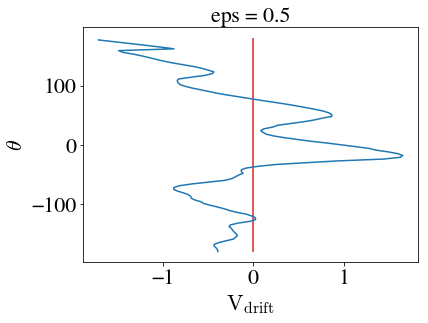

In [8]:
print(np.mean(np.abs(speeds)))
pl.plot(speeds, angles, '-')
pl.title('eps = {}'.format(params_dict['eps']))
pl.xlabel('$V_{drift}$')
pl.ylabel('$\\theta $')
pl.vlines(0, -180, 180, 'C3');